In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import langevin_cached_model as lcm
import pymc3 as pm
import scipy.io
import scipy as sp

In [11]:
# function to calculate A and B from the dataset
def OUanalytic(data):
    N = data.size
    data1sq = data[0]**2
    dataNsq = data[-1]**2
    datasq = np.sum(data[1:-1]**2)
    datacorr = np.sum(data[0:-1]*data[1:])
    coef = [(N-1)*datasq,
       (2.0-N)*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       N*datacorr]
    B=np.roots(coef)[-1]
    Q=(data1sq+dataNsq)/(1-B**2)
    Q=Q+datasq*(1+B**2)/(1-B**2)
    Q=Q-datacorr*2*B/(1-B**2)
    s2 = Q/N
    vs2 = s2/N
    Btmp = B**2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B**4*(N-1))*datasq - 2*B*(1+B**2+2*N)*datacorr
    vB = (1-B**2)**2*(data1sq+dataNsq + (1+B**2)*datasq - 2*B*datacorr)/tmp
    return s2,vs2,B,vB

def OUresult(data,deltat):
    s2, vs2, B ,vB = OUanalytic(data)
    tau = -deltat/np.log(B)
    dtau = deltat*np.sqrt(vB)/B/np.log(B)**2
    return s2,np.sqrt(vs2),tau,dtau

In [7]:
oxy_data37=scipy.io.loadmat('results/fMRI/OXY37_MRI_1_ts.mat')

mean:  -6.40646955775e-14
var:  43.9215908216
N:  736
relaxation time: 7.78708114601 SD tau 0.427154708135
A  43.6937491706 SD A 0.243652430781


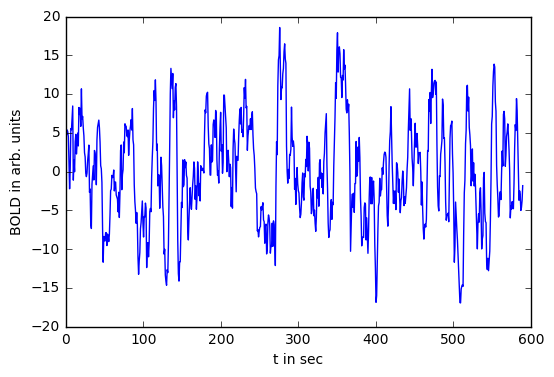

In [13]:
mpfc_r_ts=oxy_data37['mpfc_r_ts']
mpfc=np.mean(mpfc_r_ts,axis=0)
print("mean: ",mpfc.mean())
print("var: ",mpfc.std()**2)
N=len(mpfc)
print("N: ",N)
mpfc_A,mpfc_sA, mpfc_tau, mpfc_dtau = OUresult(mpfc,0.802)
print("relaxation time:",mpfc_tau, "SD tau", mpfc_dtau)
print("A ",mpfc_A,"SD A",mpfc_sA)
mpfc_norm=mpfc/np.sqrt(mpfc_A)
t = np.arange(N)*0.802 # tR = 0.802 sec
plt.plot(t,mpfc)
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")

mean:  -8.15965652533e-14
var:  36.788213768
N:  736
relaxation time: 8.86543894463 SD tau 0.483210033744
A  36.3481334973 SD A 0.222229725616
1.00603547113


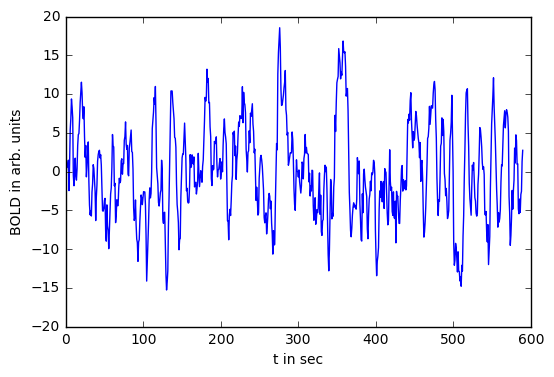

In [14]:
pcc_r_ts=oxy_data37['pcc_r_ts']
pcc=np.mean(pcc_r_ts,axis=0)
print("mean: ",pcc.mean())
print("var: ",pcc.std()**2)
N=len(pcc)
print("N: ",N)
pcc_A,pcc_sA, pcc_tau, pcc_dtau = OUresult(pcc,0.802)
print("relaxation time:",pcc_tau, "SD tau", pcc_dtau)
print("A ",pcc_A,"SD A",pcc_sA)
pcc_norm=pcc/np.sqrt(pcc_A)
print(pcc_norm.std())
plt.plot(t,pcc)
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")

mean:  -1.73831963317e-13
var:  13.3465095649
N:  736
relaxation time: 5.67436670013 SD tau 0.316933288253
A  13.2498924294 SD A 0.134173660737
1.00363933686


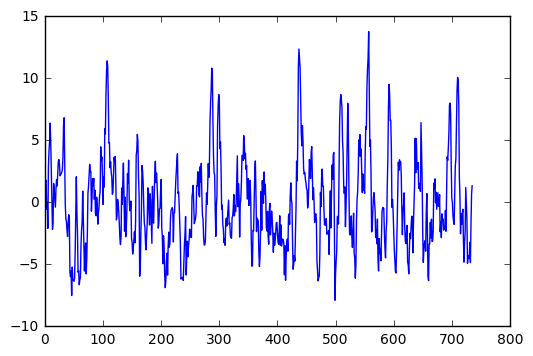

In [15]:
rlp_r_ts=oxy_data37['rlp_r_ts']
rlp=np.mean(rlp_r_ts,axis=0)
plt.plot(rlp)
print("mean: ",rlp.mean())
print("var: ",rlp.std()**2)
N=len(rlp)
print("N: ",N)
rlp_A,rlp_sA, rlp_tau, rlp_dtau = OUresult(rlp,0.802)
print("relaxation time:",rlp_tau, "SD tau", rlp_dtau)
print("A ",rlp_A,"SD A",rlp_sA)
rlp_norm=rlp/np.sqrt(rlp_A)
print(rlp_norm.std())

mean:  -1.19749620847e-13
var:  73.2901308929
N:  736
relaxation time: 9.45267995758 SD tau 0.513832500885
A  72.3979894218 SD A 0.313634872827
1.00614250393


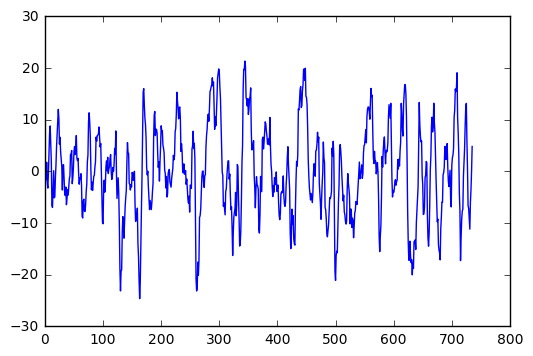

In [16]:
llp_r_ts=oxy_data37['llp_r_ts']
llp=np.mean(llp_r_ts,axis=0)
plt.plot(llp)
print("mean: ",llp.mean())
print("var: ",llp.std()**2)
N=len(llp)
print("N: ",N)
llp_A,llp_sA, llp_tau, llp_dtau = OUresult(llp,0.802)
print("relaxation time:",llp_tau, "SD tau", llp_dtau)
print("A ",llp_A,"SD A",llp_sA)
llp_norm=llp/np.sqrt(llp_A)
print(llp_norm.std())

In [19]:
def OUcross(data1,data2):
    x1 = data1 + data2
    x2 = data1 - data2
    x1_A,x1_dA, x1_tau ,x1_dtau= OUresult(x1,0.802)
    x2_A, x2_dA, x2_tau ,x2_dtau= OUresult(x2,0.802)
    return (x1_A - x2_A)/x2_A, np.sqrt(x1_dA**2 + x1_A**2*x2_dA**2/x2_A**4)
print(OUcross(mpfc_norm,pcc_norm))
print(OUcross(mpfc_norm,rlp_norm))
print(OUcross(mpfc_norm,llp_norm))
print(OUcross(pcc_norm,rlp_norm))
print(OUcross(pcc_norm,llp_norm))
print(OUcross(rlp_norm,llp_norm))

(11.273604431351139, 0.82908023376063666)
(0.88547184535466594, 0.083878357475022883)
(3.6658180185574856, 0.21558523455236556)
(1.1425179125336959, 0.092762731216522995)
(8.3504963108533001, 0.55913942891056034)
(1.3270814515826381, 0.099599311738605339)
